# Modeling citibike data

In [1]:
# %load /Users/Andy/jupyter_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3


### Load the full combined dataset, which was made in *citibike_regression_make_data*

In [2]:
df_comb = pd.read_csv('data/data_comb.csv')
df_comb.head()


,yday,Nrides,date,Tmean,precip_In,max_gust_mph,cloud_cover,N_stations,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,public
0,182,16650,2013-07-01,76,0.73,26.0,8,326,0,0,0,0,0,0,0.0
1,183,22745,2013-07-02,78,0.06,23.0,7,327,1,0,0,0,0,0,0.0
2,184,21864,2013-07-03,80,0.96,23.0,7,326,0,1,0,0,0,0,0.0
3,185,22326,2013-07-04,84,0.00,24.0,4,324,0,0,1,0,0,0,0.0
4,186,21842,2013-07-05,85,0.00,23.0,1,325,0,0,0,1,0,0,0.0


In [3]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 15 columns):
yday            1176 non-null int64
Nrides          1176 non-null int64
date            1176 non-null object
Tmean           1176 non-null int64
precip_In       1176 non-null float64
max_gust_mph    1173 non-null float64
cloud_cover     1176 non-null int64
N_stations      1176 non-null int64
wkday_1         1176 non-null int64
wkday_2         1176 non-null int64
wkday_3         1176 non-null int64
wkday_4         1176 non-null int64
wkday_5         1176 non-null int64
wkday_6         1176 non-null int64
public          1176 non-null float64
dtypes: float64(3), int64(11), object(1)
memory usage: 137.9+ KB


## Split the data into predictor/target arrays in prep for modelling

In [5]:
X = df_comb.drop(columns=['date','Nrides'], axis=1)
X.head()

,yday,Tmean,precip_In,max_gust_mph,cloud_cover,N_stations,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,public
0,182,76,0.73,26.0,8,326,0,0,0,0,0,0,0.0
1,183,78,0.06,23.0,7,327,1,0,0,0,0,0,0.0
2,184,80,0.96,23.0,7,326,0,1,0,0,0,0,0.0
3,185,84,0.00,24.0,4,324,0,0,1,0,0,0,0.0
4,186,85,0.00,23.0,1,325,0,0,0,1,0,0,0.0


In [6]:
y = df_comb['Nrides']
y.head()

0    16650
1    22745
2    21864
3    22326
4    21842
Name: Nrides, dtype: int64

## Split data into training/test sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=39)

# data goes from 2013-07-01 to 2017-03-31


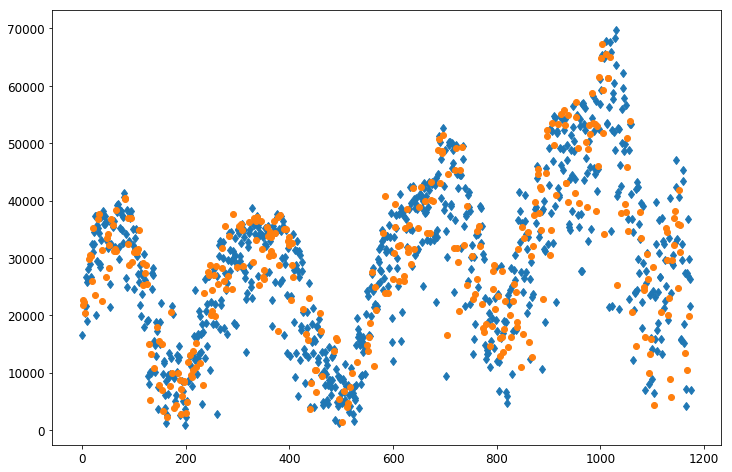

In [8]:
plt.figure(figsize=(12,8))
plt.plot(y_train,'d')
plt.plot(y_test,'o')

## Model 1: Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

#imp = Imputer(strategy='most_frequent')
imp = Imputer(strategy='mean')
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test  =imp.transform(X_test)
X_all   = imp.transform(X)

reg = LinearRegression()
reg.fit(X_train,y_train)
preds = reg.predict(X_test)
cv_linreg_mean = np.mean(cross_val_score(reg,X_train,y_train))
cv_linreg_mean

0.824312224323951

In [10]:
# score on training set
reg.score(X_train,y_train)

0.8352300554047147

In [11]:
# score on test set
lin_reg_test_score=reg.score(X_test,y_test)
lin_reg_test_score

0.8140628170602389

In [12]:
from sklearn.metrics import mean_squared_error
RMSE_linreg = mean_squared_error(y_test, reg.predict(X_test))**0.5
RMSE_linreg

5916.716806739179

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


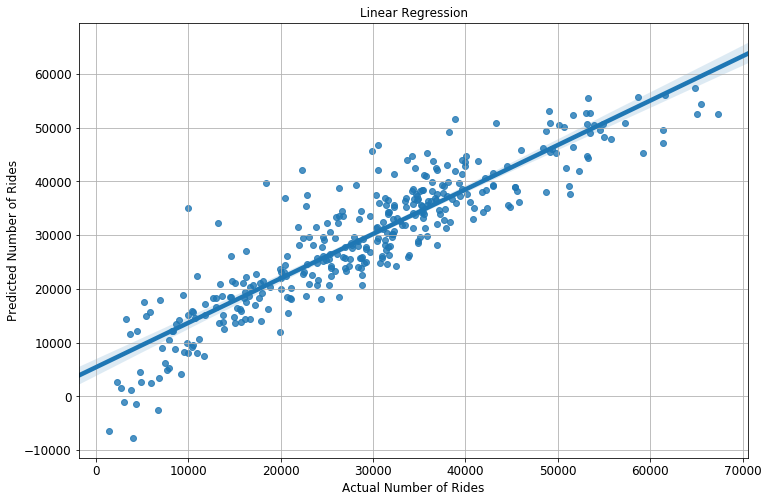

In [13]:
# plot predictions vs actual values
plt.figure(figsize=(12,8))
#plt.scatter(y_test,preds)
sns.regplot(y_test,preds)
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Linear Regression')
plt.grid();

In [14]:
# Examine coefficients
coefs = pd.DataFrame({'vars':X.columns,'coef':reg.coef_,'coef_abs':np.abs(reg.coef_)})
coefs.sort_values('coef_abs',ascending=False)

,vars,coef,coef_abs
12,public,-8530.662198,8530.662198
2,precip_In,-6716.776104,6716.776104
11,wkday_6,-6449.688106,6449.688106
10,wkday_5,-5136.719385,5136.719385
7,wkday_2,2299.224643,2299.224643
8,wkday_3,1428.366349,1428.366349
6,wkday_1,1122.361373,1122.361373
4,cloud_cover,-1102.548914,1102.548914
1,Tmean,497.087055,497.087055
3,max_gust_mph,-107.648377,107.648377


### plot timeseries of actual and predicted values from linear regression

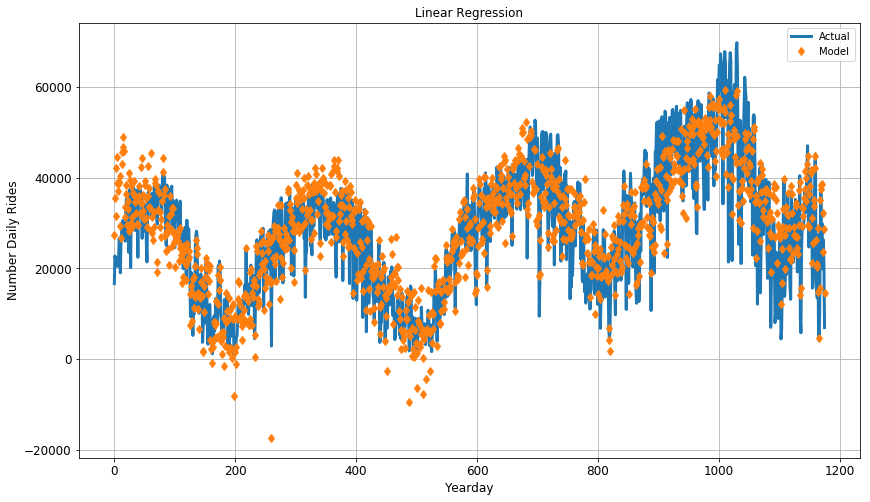

In [15]:
#
plt.figure(figsize=(14,8))
plt.plot(y,label='Actual')
plt.plot(reg.predict(X_all),'d',label='Model')
plt.legend();
plt.xlabel('Yearday')
plt.ylabel('Number Daily Rides')
plt.title('Linear Regression')
plt.grid();

plt.savefig('/Users/Andy/andypicke.github.io/images/reg_vs_actual_timeseries.png')

### plot timeseries of residuals

(-25000, 15000)

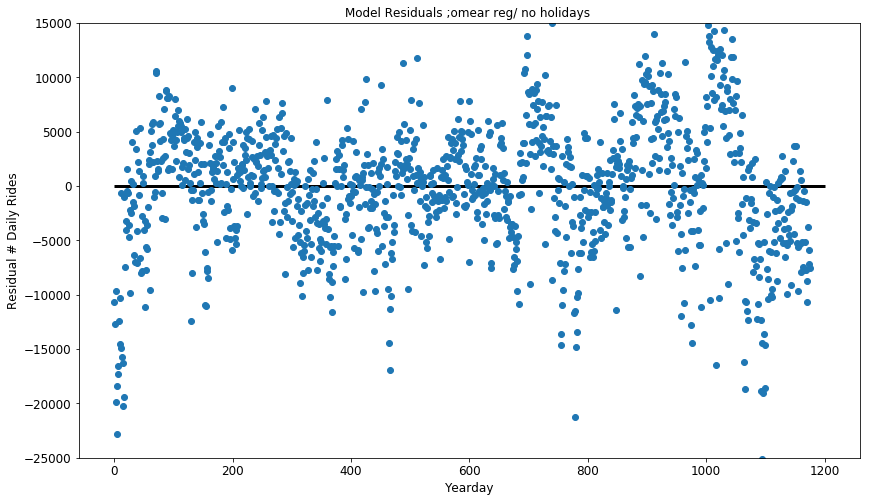

In [16]:
plt.figure(figsize=(14,8))
#plt.plot(y,label='Actual')
plt.plot(y-reg.predict(X_all),'o')
#plt.legend();
plt.xlabel('Yearday')
plt.ylabel('Residual # Daily Rides')
plt.title('Model Residuals ;omear reg/ no holidays ');
plt.hlines(xmin=0,xmax=1200,y=0);
plt.ylim(-25000,15000)

#plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/')'

### Model 2: Random forest regression

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train))

/Users/Andy/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8809842330942749

In [18]:
rf.score(X_train, y_train)

0.9863977368758153

In [19]:
RMSE_rf = mean_squared_error(y_test, rf.predict(X_test))**0.5
RMSE_rf

4194.13646346412

### Model 3: Random Forest optimized w/ gridsearchCV

In [20]:
# optimize RF
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,150],'min_samples_split':[2,5,10]}
rf2 = RandomForestRegressor()
cv = GridSearchCV(rf2, params)
cv.fit(X_train, y_train)
rf2 = cv.best_estimator_
np.mean( cross_val_score(rf2, X_train, y_train) )

0.8801509389363152

In [21]:
rf2.score(X_test, y_test)

0.9050310690329065

In [22]:
RMSE_rf2= mean_squared_error(y_test, rf2.predict(X_test))**0.5
RMSE_rf2

4228.520440258383

In [23]:
rf2

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
# Compare RMSE
print('Lin Reg.     : ' + str(RMSE_linreg))
print('Rand Forest  : ' + str(RMSE_rf))
print('Rand Forest opti.  : ' + str(RMSE_rf))


Lin Reg.     : 5916.716806739179
Rand Forest  : 4194.13646346412
Rand Forest opti.  : 4194.13646346412


/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


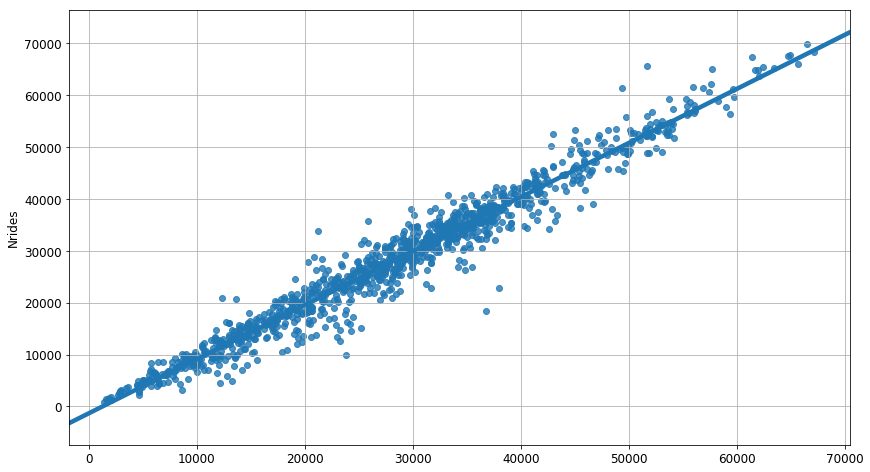

In [25]:
plt.figure(figsize=(14,8))
sns.regplot(rf2.predict(X_all), y)
plt.grid()

#plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/')'

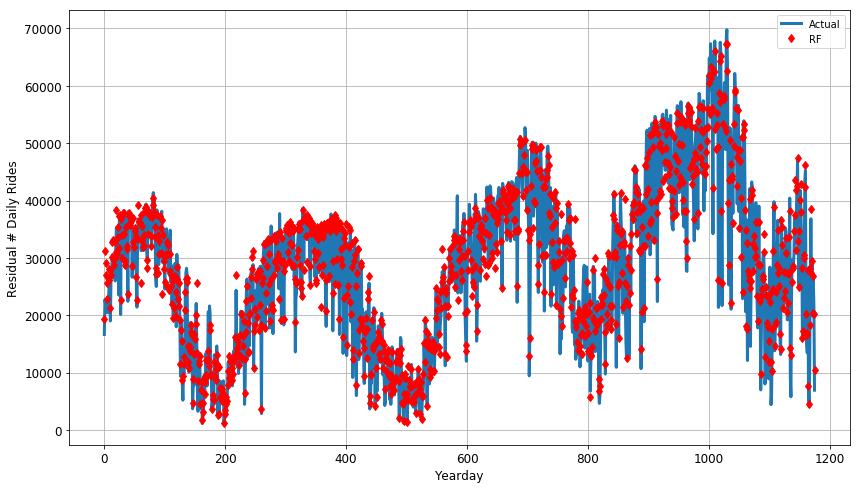

In [26]:
plt.figure(figsize=(14,8))
#plt.plot(y,label='Actual')
plt.plot(y, label='Actual')
plt.plot(rf.predict(X_all),'rd',label='RF')
plt.legend()
plt.xlabel('Yearday')
plt.ylabel('Residual # Daily Rides')
plt.grid();
#plt.title('Model Residuals ');
#plt.hlines(xmin=0,xmax=360,y=0);
#plt.ylim(-25000,20000)

### Plot timeseries of actual and predicted by random forest

(-25000, 20000)

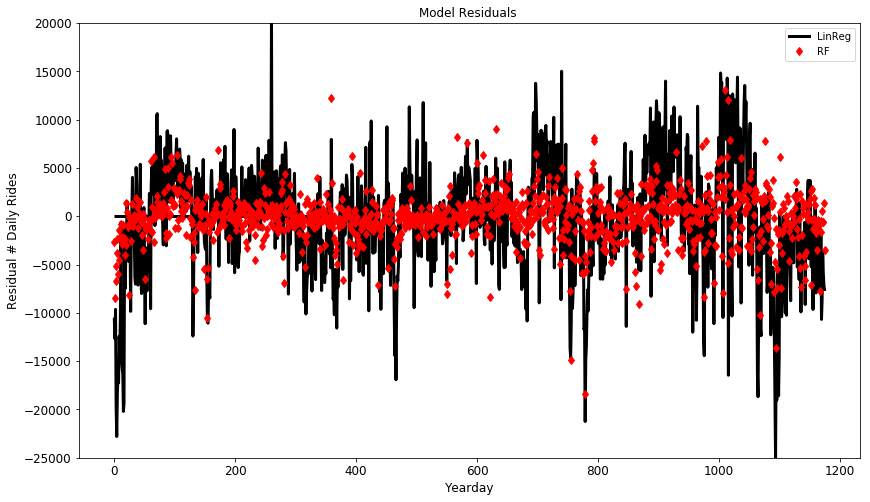

In [27]:
plt.figure(figsize=(14,8))
#plt.plot(y,label='Actual')
plt.plot(y-reg.predict(X_all),'k',label='LinReg')
plt.plot(y-rf.predict(X_all),'rd',label='RF')
plt.legend();
plt.xlabel('Yearday')
plt.ylabel('Residual # Daily Rides')
plt.title('Model Residuals ');
plt.hlines(xmin=0,xmax=360,y=0);
plt.ylim(-25000,20000)

In [28]:
rf_imp = pd.DataFrame({'vars':X.columns,'imp':rf.feature_importances_})
rf_imp.sort_values('imp',ascending=False)

,vars,imp
1,Tmean,0.508508
5,N_stations,0.276910
2,precip_In,0.079505
0,yday,0.058271
4,cloud_cover,0.030856
3,max_gust_mph,0.014733
11,wkday_6,0.013332
10,wkday_5,0.007269
7,wkday_2,0.003029
6,wkday_1,0.002400


### Look at dates of residuals to see if any are holidays etc:

In [29]:
X2 = df_comb.copy()
# add residuals 
X2['resid'] = y - reg.predict(X_all)
X2.head()

,yday,Nrides,date,Tmean,precip_In,max_gust_mph,cloud_cover,N_stations,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,public,resid
0,182,16650,2013-07-01,76,0.73,26.0,8,326,0,0,0,0,0,0,0.0,-10664.409008
1,183,22745,2013-07-02,78,0.06,23.0,7,327,1,0,0,0,0,0,0.0,-12685.099219
2,184,21864,2013-07-03,80,0.96,23.0,7,326,0,1,0,0,0,0,0.0,-9641.259696
3,185,22326,2013-07-04,84,0.00,24.0,4,324,0,0,1,0,0,0,0.0,-19831.975087
4,186,21842,2013-07-05,85,0.00,23.0,1,325,0,0,0,1,0,0,0.0,-22795.357722


In [30]:
X2[['resid','date']].sort_values('resid').head(10)

,resid,date
1094,-25120.818567,2016-12-25
4,-22795.357722,2013-07-05
779,-21242.000576,2015-12-24
15,-20200.608662,2013-07-18
3,-19831.975087,2013-07-04
16,-19363.663490,2013-07-19
1096,-19038.807888,2016-12-29
1093,-18812.343149,2016-12-24
1065,-18677.132581,2016-11-25
1099,-18587.284164,2017-01-02


In [31]:
X2[['resid','date']].sort_values('resid').tail(10)

,resid,date
1004,13286.400187,2016-09-16
1043,13525.057471,2016-11-02
697,13755.341270,2015-09-25
1005,13829.248255,2016-09-17
912,13979.883580,2016-06-02
1014,14294.160064,2016-09-26
1031,14391.136779,2016-10-20
1003,14820.530487,2016-09-15
740,15001.843726,2015-11-11
260,20288.477294,2014-04-30


Below we can see that some of the largest residuals occurred on or near holidays (Thanksgiving, Christmas etc.). So we should probably include holidays as a predictor.

In [32]:
# plot residuals and holidays
#plt.figure(figsize=(14,8))
#plt.plot(X.date,X.resid,'o')
##ax=plt.gca()
#plt.axvline?
#plt.vlines(x=df_holi.loc[:,'observed'].values,ymin=-25000,ymax=15000)
#plt.xlabel('Yearday ' )
#plt.ylabel('Model Residual')
#plt.title('Model Residual (not including holidays) w/ Holidays Marked')
#plt.savefig('figures/2016_linreg_resids_holi_timeseries.pdf')

### It looks like a lot of the big residueals occur a day or two before/after holidays; maybe try making a 'near holiday' variable?
- example: 2 days before/after Thanksgiving
- last days of December (people likely take long weekend before New years
- Xmas in 2016 was 'observed' on the 26th. Need to modify holiday df to include both actual and observed dates for holidays?